In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {'Oarsmen': [1, 2, 2, 2, 4, 4, 4, 8], 'Speed': [2/(6/60 + 30.74/3600), 2/(6/60 + 8.5/3600), 2/(6/60 + 33.26/3600), 2/(5/60 + 59.72/3600), 2/(5/60 + 37.86/3600), 2/(5/60 + 58.96/3600), 2/(5/60 + 32.03/3600), 2/(5/60 + 18.68/3600)]}

frame = pd.DataFrame(data)
frame

,Oarsmen,Speed
0,1,18.426575
1,2,19.538670
2,2,18.308498
3,2,20.015568
4,4,21.310602
5,4,20.057945
6,4,21.684788
7,8,22.593197


<AxesSubplot:xlabel='Oarsmen'>

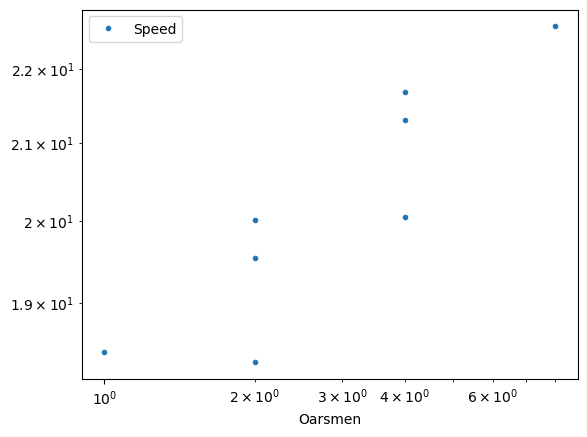

In [10]:
frame.plot(y='Speed', x='Oarsmen', style='.', logx=True, logy=True)

In [11]:
import math
from sklearn.linear_model import LinearRegression

def predict(x, model):
  log_prediction = model.predict(np.array([math.log10(x)]).reshape(-1, 1))[0]
  prediction = pow(10.0, log_prediction)
  print(f"prediction: {prediction}")
  return prediction

def regress(x, y):
  model = LinearRegression()

  # log-log
  x_log = np.log10(x)
  y_log = np.log10(y)

  model.fit(x_log.reshape(-1, 1), y_log)

  r_sq = model.score(x_log.reshape(-1, 1), y_log)
  print(f"coefficient of determination: {r_sq}")
  print(f"intercept: {model.intercept_}")
  print(f"slope: {model.coef_}")

  this_normalize = lambda pair: normalize(pair, model)

  zipped_array = np.array(list(zip(x, y)))
  # print(f"Zipped: {zipped_array}")

  return model

In [12]:
model = regress(frame["Oarsmen"].to_numpy(), frame["Speed"].to_numpy())

coefficient of determination: 0.7922683218531237
intercept: 1.257956799517139
slope: [0.10456347]


In [13]:
# frame.insert(2, 'Regression', frame["Axis"].map(lambda x: predict(x, model)))
frame["Regression"] = frame["Oarsmen"].map(lambda x: predict(x, model))
frame

prediction: 18.111599225320116
prediction: 19.47303030758906
prediction: 19.47303030758906
prediction: 19.47303030758906
prediction: 20.936798823935977
prediction: 20.936798823935977
prediction: 20.936798823935977
prediction: 22.510597378525762


,Oarsmen,Speed,Regression
0,1,18.426575,18.111599
1,2,19.538670,19.473030
2,2,18.308498,19.473030
3,2,20.015568,19.473030
4,4,21.310602,20.936799
5,4,20.057945,20.936799
6,4,21.684788,20.936799
7,8,22.593197,22.510597


<AxesSubplot:xlabel='Oarsmen'>

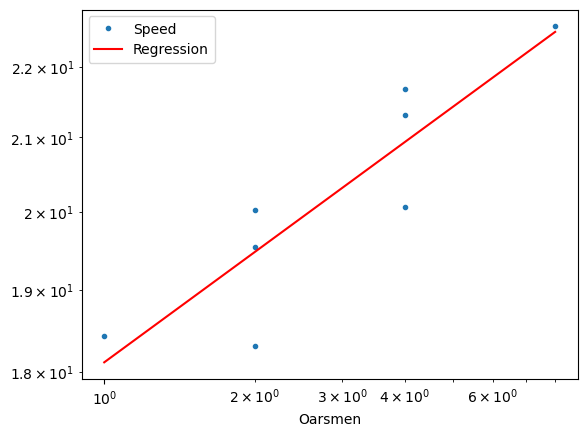

In [19]:
ax = frame.plot(x='Oarsmen', y='Speed', logx=True, logy=True, style='.')
frame.plot(x='Oarsmen', y='Regression',color='Red', ax=ax)